In [15]:
# Instale as dependências conforme necessário:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Defina o caminho para o arquivo que você gostaria de carregar
file_path = "spotify_songs_dataset.csv"

# Carregue a versão mais recente
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "refiaozturk/spotify-songs-dataset",
  file_path,
  # Forneça quaisquer argumentos adicionais como
  # sql_query ou pandas_kwargs. Veja a
  # documentação para mais informações:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
  # https://www.kaggle.com/code/selinspark/music-trends-and-song-popularity
)

print("Primeiros 5 registros:", df.head())

/tmp/ipython-input-3385671429.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Primeiros 5 registros:   song_id               song_title             artist              album  \
0  SP0001  Space executive series.       Sydney Clark              What.   
1  SP0002     Price last painting.  Connor Peters DDS   Nature politics.   
2  SP0003                   Piece.         Anna Keith             Visit.   
3  SP0004     Power industry your.    Zachary Simpson  Behavior evening.   
4  SP0005      Food animal second.  Christopher Mcgee             Front.   

        genre release_date  duration  popularity    stream language  \
0  Electronic   1997-11-08     282.0          42  35055874  English   
1  Electronic   2015-05-10     127.0          50   9249527  English   
2         Pop   2024-07-08       NaN          10  76669110  English   
3     Hip-Hop   2022-08-15     214.0          86  34732016  English   
4         Pop   2023-03-05     273.0          63  96649372  English   

  explicit_content            label       composer           producer  \
0              Yes  

In [16]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load the dataset
# df = pd.read_csv('/kaggle/input/spotify-songs-dataset/spotify_songs_dataset.csv')

# # Preview the dataset
# df.head()

In [17]:
print(df.isnull().sum())

song_id                 0
song_title              0
artist                  0
album                   0
genre                   0
release_date            0
duration             5000
popularity              0
stream                  0
language             2500
explicit_content        0
label                   0
composer                0
producer                0
collaboration       35000
dtype: int64


In [18]:
print(df.describe())

           duration    popularity        stream
count  45000.000000  50000.000000  5.000000e+04
mean     239.659178     50.783440  5.019183e+07
std       50.136727     28.948749  2.893624e+07
min       33.000000      1.000000  1.899000e+03
25%      206.000000     26.000000  2.523311e+07
50%      240.000000     51.000000  5.042169e+07
75%      273.000000     76.000000  7.519064e+07
max      433.000000    100.000000  9.999913e+07


In [19]:
print(df.describe())

           duration    popularity        stream
count  45000.000000  50000.000000  5.000000e+04
mean     239.659178     50.783440  5.019183e+07
std       50.136727     28.948749  2.893624e+07
min       33.000000      1.000000  1.899000e+03
25%      206.000000     26.000000  2.523311e+07
50%      240.000000     51.000000  5.042169e+07
75%      273.000000     76.000000  7.519064e+07
max      433.000000    100.000000  9.999913e+07


In [20]:
# Sort songs by popularity
top_popular_songs = df[['song_title', 'artist', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

print(top_popular_songs)

                      song_title              artist  popularity
7669           Boy actually dog.      Stephanie Chen         100
7748    Usually perform western.  Gabrielle Fletcher         100
30635          Just body record.         Kelli Jones         100
14271     Candidate where adult.         Judith Mann         100
14412          Worry power task.      Regina Johnson         100
6476            Night hope pull.         Scott Munoz         100
49548   Friend something policy.          Mary Grant         100
8087          Author party note.        Misty Miller         100
30994  Cut environmental beyond.      Yolanda Ibarra         100
30977          Base thing table.      Andrew Bradley         100


/tmp/ipython-input-3385868531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_popular_songs, x='popularity', y='song_title', palette='viridis')


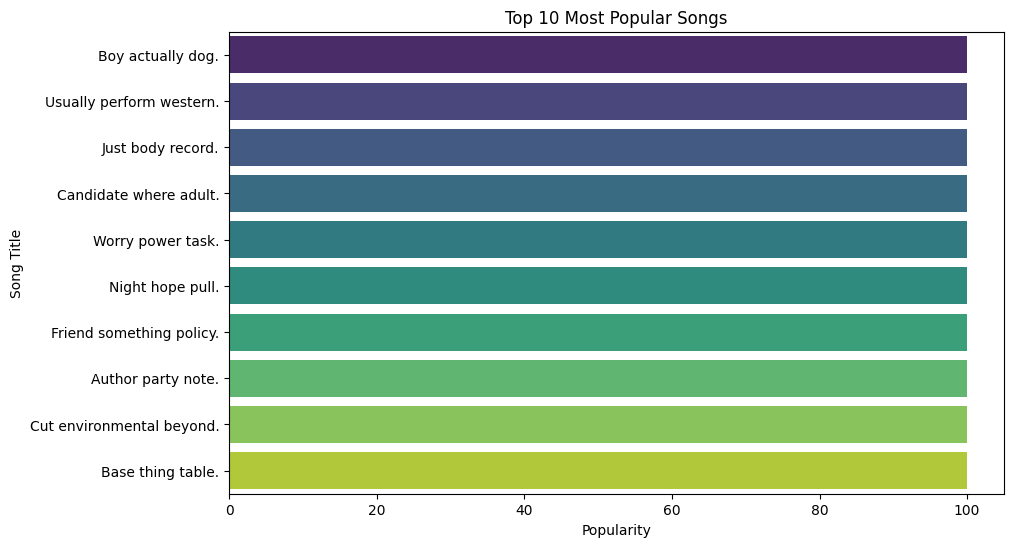

In [21]:
# Barplot of top 10 songs by popularity
plt.figure(figsize=(10, 6))
sns.barplot(data=top_popular_songs, x='popularity', y='song_title', palette='viridis')
plt.title('Top 10 Most Popular Songs')
plt.xlabel('Popularity')
plt.ylabel('Song Title')
plt.show()

In [22]:
# Count of songs per genre
genre_counts = df['genre'].value_counts()

print(genre_counts.head(10))

# Average popularity by genre
genre_popularity = df.groupby('genre')['popularity'].mean().sort_values(ascending=False)

print(genre_popularity.head(10))

genre
Electronic    12568
Pop           12534
Hip-Hop       12298
Folk           2559
Classical      2542
Country        2511
Jazz           2504
R&B            1513
Reggae          971
Name: count, dtype: int64
genre
Country       51.661888
Folk          51.467370
Hip-Hop       50.918117
Electronic    50.853517
Pop           50.684059
Jazz          50.431310
R&B           50.335096
Reggae        49.954686
Classical     49.649489
Name: popularity, dtype: float64


/tmp/ipython-input-719009250.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).index, y=genre_counts.head(10).values, palette='pastel')


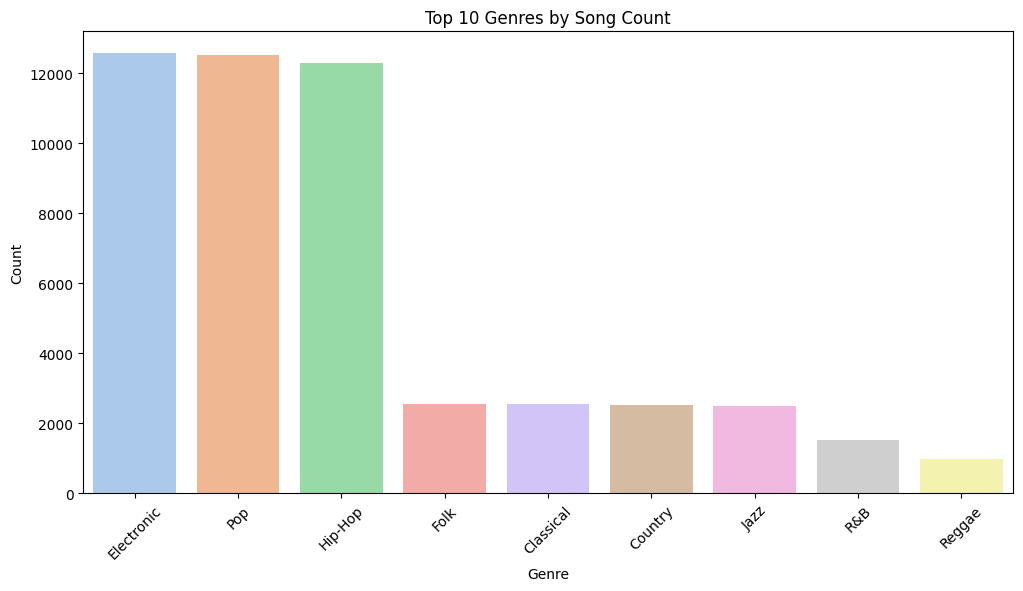

In [23]:
# Visualizing top 10 genres by song count
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.head(10).index, y=genre_counts.head(10).values, palette='pastel')
plt.title('Top 10 Genres by Song Count')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Correlation matrix
correlation = df[['stream', 'duration', 'popularity']].corr()

print(correlation)

              stream  duration  popularity
stream      1.000000  0.000947   -0.000579
duration    0.000947  1.000000    0.000256
popularity -0.000579  0.000256    1.000000


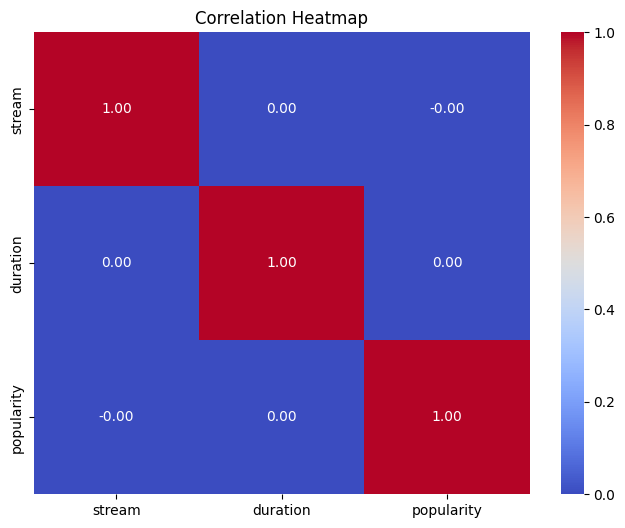

In [25]:
# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [26]:
# Count of songs by language
language_counts = df['language'].value_counts()

print(language_counts.head(10))

# Average popularity by language
language_popularity = df.groupby('language')['popularity'].mean().sort_values(ascending=False)

print(language_popularity.head(10))

language
English     33299
Spanish      4725
French       2419
Korean       2328
Italian      1902
Japanese     1417
German       1410
Name: count, dtype: int64
language
German      51.637589
Italian     51.139327
English     50.899036
French      50.763125
Spanish     50.400635
Japanese    50.335921
Korean      50.026632
Name: popularity, dtype: float64


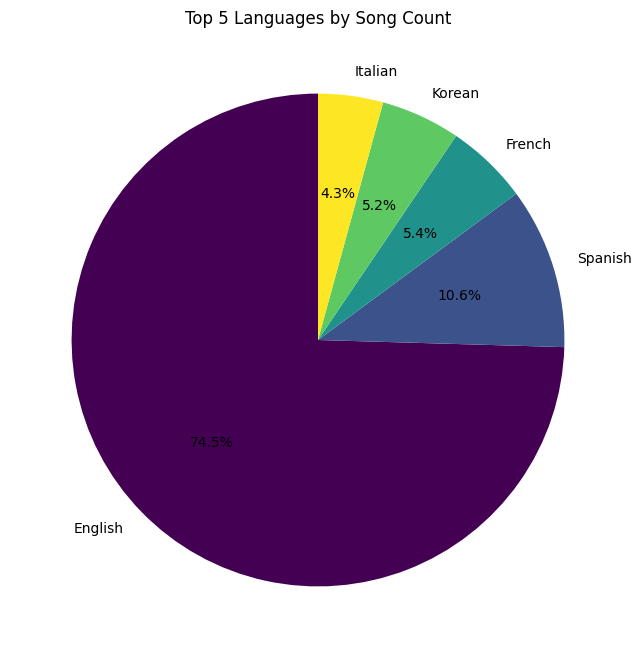

In [27]:
# Pie chart for language distribution
plt.figure(figsize=(8, 8))
df['language'].value_counts().head(5).plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Top 5 Languages by Song Count')
plt.ylabel('')
plt.show()

In [28]:
# Convert release_date to datetime and extract year
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

# Average popularity by year
yearly_popularity = df.groupby('release_year')['popularity'].mean()

print(yearly_popularity)

release_year
1994    50.067568
1995    50.014802
1996    50.823877
1997    52.466667
1998    50.500595
1999    51.148328
2000    51.611307
2001    50.869863
2002    50.491637
2003    51.273939
2004    50.035067
2005    50.668047
2006    50.305706
2007    50.734356
2008    50.431629
2009    49.843998
2010    50.085732
2011    50.601449
2012    51.170031
2013    51.005981
2014    50.246869
2015    51.395961
2016    52.077110
2017    50.269053
2018    50.420189
2019    52.321491
2020    50.533333
2021    49.971564
2022    51.290076
2023    49.950860
2024    51.074074
Name: popularity, dtype: float64


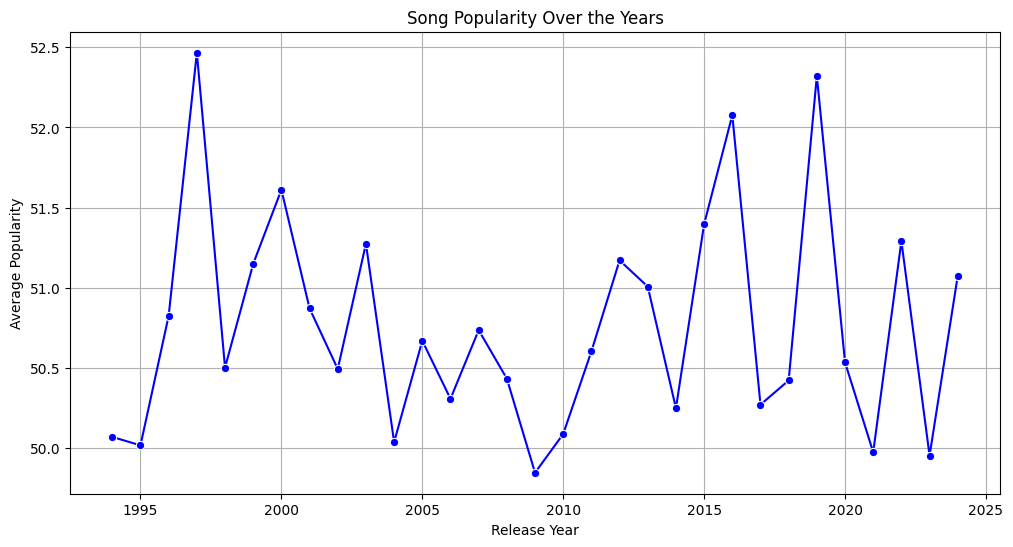

In [29]:
# Line plot for popularity over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_popularity.index, y=yearly_popularity.values, marker='o', color='blue')
plt.title('Song Popularity Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

In [30]:
# Average popularity for explicit vs non-explicit songs
explicit_popularity = df.groupby('explicit_content')['popularity'].mean()

print(explicit_popularity)

explicit_content
No     50.917004
Yes    50.650759
Name: popularity, dtype: float64


/tmp/ipython-input-594799496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=explicit_popularity.index, y=explicit_popularity.values, palette='muted')


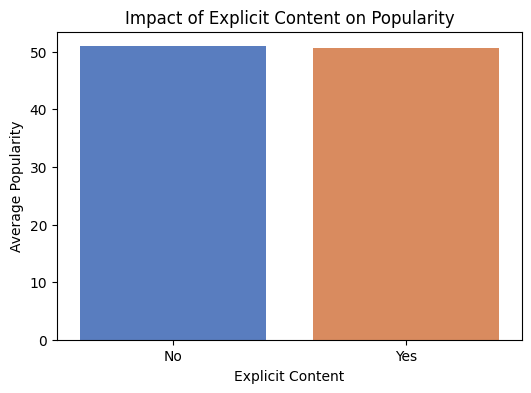

In [31]:
# Barplot for explicit vs non-explicit popularity
plt.figure(figsize=(6, 4))
sns.barplot(x=explicit_popularity.index, y=explicit_popularity.values, palette='muted')
plt.title('Impact of Explicit Content on Popularity')
plt.xlabel('Explicit Content')
plt.ylabel('Average Popularity')
plt.show()